In [1]:
!pip install numpy pandas matplotlib seaborn scikit-learn tensorflow

Лабораторная работа №7 Исследование изображений сверточными нейронными сетями.
Цель работы – написать программу на языках Python, выполняющую построение и обучение классификатора изображений с помощью сверточных нейронных сетей, требуется подобрать безизбыточную архитектуру сети, работающей с допустимым уровнем ошибки и визуализировать процесс обучения моделей. Результаты работы привести в отчете.

1) Импорт библиотек
os — доступ к файловой системе.
numpy — работа с массивами данных.
matplotlib.pyplot — визуализация графиков и изображений.
tensorflow.keras.models.Sequential — создание модели нейронной сети.
tensorflow.keras.layers.Conv2D — свертка для извлечения признаков.
tensorflow.keras.layers.MaxPooling2D — уменьшение размерности данных.
tensorflow.keras.layers.Flatten — преобразование многомерных данных в одномерный вектор.
tensorflow.keras.layers.Dense — полносвязный слой для классификации.
tensorflow.keras.layers.Dropout — предотвращение переобучения.
tensorflow.keras.preprocessing.image.ImageDataGenerator — генерация и аугментация изображений.

In [2]:
# Импор необходимых библиотек
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2) Загружаем набор данных https://www.kaggle.com/datasets/fantacher/neu-metal-surface-defects-data.
Набор данных содержит изображения 6 различных дефектов на поверхности металла. Данные разделены на обучающий и валидационный наборы с помощью Keras ImageDataGenerator.

In [3]:
# Путь к каталогу с данными
data_dir = '/kaggle/input/neu-metal-surface-defects-data/NEU Metal Surface Defects Data'

# Параметры изображения: ширина и высота
img_width, img_height = 200, 200
batch_size = 32  # Размер пакета данных для обучения

# Создание генератора изображений с нормализацией и разделением на обучение/валидацию
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Генератор для обучающей выборки
train_generator = datagen.flow_from_directory(
    data_dir,  # Путь к данным
    target_size=(img_width, img_height),  # Размер изображений
    batch_size=batch_size,  # Размер пакета
    class_mode='categorical',  # Тип классификации (категориальная)
    subset='training')  # Выбор обучающей выборки

# Генератор для валидационной выборки
validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')  # Выбор валидационной выборки


Found 1441 images belonging to 3 classes.
Found 359 images belonging to 3 classes.


3) Вывод данных

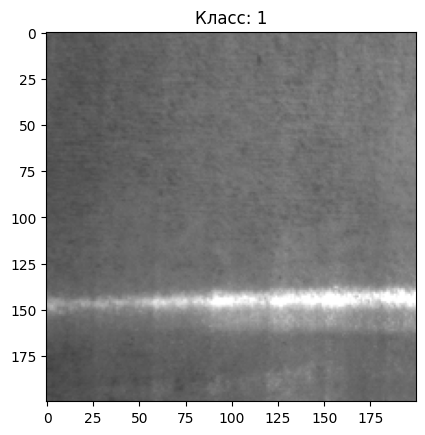

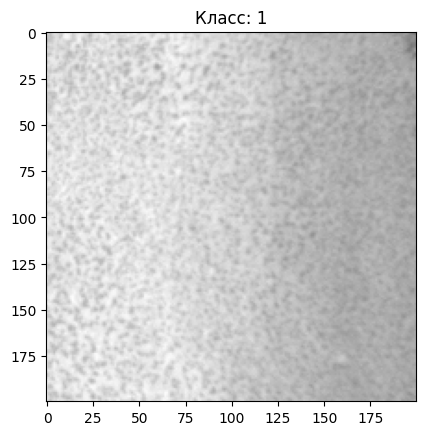

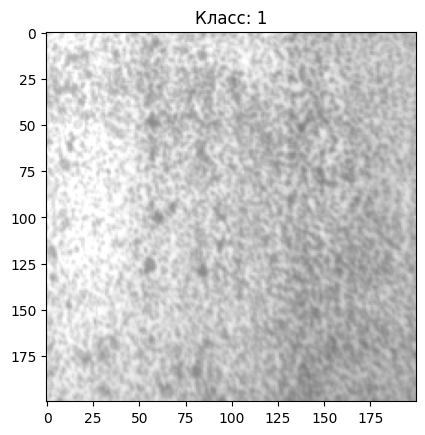

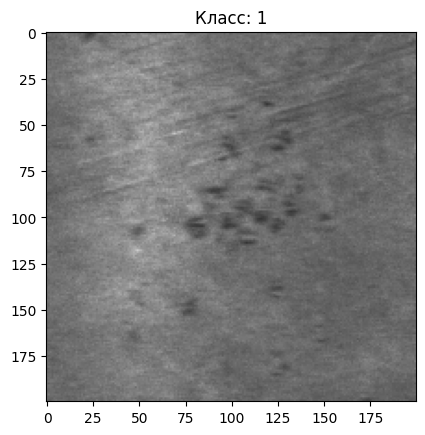

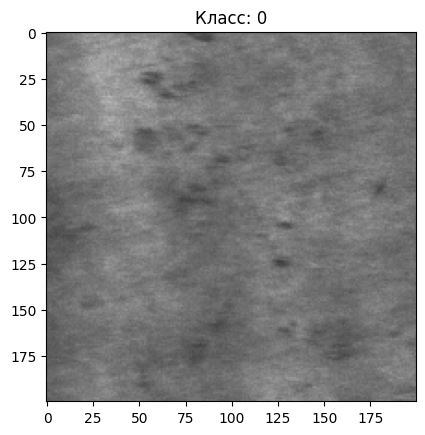

In [4]:
import matplotlib.pyplot as plt

# Получаем первую порцию данных (первую партию)
images, labels = next(train_generator)

# Выводим первые несколько изображений
for i in range(5):
    plt.imshow(images[i])
    plt.title(f'Класс: {np.argmax(labels[i])}')
    plt.show()


4) Построение модели CNN
Построим модель сверточной нейронной сети для классификации изображений дефектов труб.
Модель состоит из нескольких сверточных слоев для извлечения признаков изображений и полносвязного слоя для классификации на 6 классов.

In [5]:
# Создание последовательной модели
model = Sequential()

# Первый сверточный слой с 32 фильтрами 3x3 и функцией активации ReLU
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
# Макспулинг слой для уменьшения размерности карты признаков
model.add(MaxPooling2D(pool_size=(2, 2)))

# Второй сверточный слой с 64 фильтрами 3x3 и активацией ReLU
model.add(Conv2D(64, (3, 3), activation='relu'))
# Макспулинг для дальнейшего уменьшения размерности
model.add(MaxPooling2D(pool_size=(2, 2)))

# Третий сверточный слой с 128 фильтрами 3x3 и активацией ReLU
model.add(Conv2D(128, (3, 3), activation='relu'))
# Макспулинг для уменьшения карт признаков
model.add(MaxPooling2D(pool_size=(2, 2)))

# Полносвязный слой: преобразует карты признаков в одномерный вектор
model.add(Flatten())
# Полносвязный слой с 128 нейронами и активацией ReLU
model.add(Dense(128, activation='relu'))
# Dropout для предотвращения переобучения
model.add(Dropout(0.5))
# Выходной слой с 6 нейронами для классификации 3 классов, softmax для многоклассовой классификации
model.add(Dense(3, activation='softmax'))

# Компиляция модели: оптимизатор Adam, функция потерь — categorical crossentropy, метрика — accuracy
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Вывод архитектуры модели
model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 198, 198, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 99, 99, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 97, 97, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 46, 46, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 23, 23, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 67712)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     8,667,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,760,899 (33.42 MB)

 Trainable params: 8,760,899 (33.42 MB)

 Non-trainable params: 0 (0.00 B)

5) Обучение модели
Запустим процесс обучения модели с использованием подготовленных данных.
Модель обучается на данных в течение 10 эпох. Оптимизатор Adam используется для настройки весов модели.

In [6]:
# Обучение модели на данных генератора
history = model.fit(
    train_generator,  # данные для обучения (сгенерированные изображения и метки классов)
    steps_per_epoch=train_generator.samples // batch_size,  # количество шагов за одну эпоху
    validation_data=validation_generator,  # данные для валидации (изображения для проверки точности)
    validation_steps=validation_generator.samples // batch_size,  # количество шагов для валидации
    epochs=10)  # количество эпох обучения



Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


45/45 ━━━━━━━━━━━━━━━━━━━━ 76s 2s/step - accuracy: 0.8962 - loss: 0.5397 - val_accuracy: 0.9205 - val_loss: 0.3309
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9062 - loss: 0.3758 - val_accuracy: 1.0000 - val_loss: 0.0861
Epoch 3/10


/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


45/45 ━━━━━━━━━━━━━━━━━━━━ 71s 2s/step - accuracy: 0.9188 - loss: 0.3763 - val_accuracy: 0.9261 - val_loss: 0.3146
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8750 - loss: 0.5057 - val_accuracy: 0.7143 - val_loss: 0.9350
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 71s 2s/step - accuracy: 0.9037 - loss: 0.4254 - val_accuracy: 0.9205 - val_loss: 0.3325
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9375 - loss: 0.2512 - val_accuracy: 1.0000 - val_loss: 0.0831
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 71s 2s/step - accuracy: 0.9233 - loss: 0.3423 - val_accuracy: 0.9233 - val_loss: 0.3246
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8750 - loss: 0.5353 - val_accuracy: 0.8571 - val_loss: 0.6362
Epoch 9/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 70s 2s/step - accuracy: 0.9201 - loss: 0.3519 - val_accuracy: 0.9205 - val_loss: 0.3310
Epoch 10/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 6s 95ms/step - accuracy: 0.9375 - loss: 0.2885 - val_accuracy: 1.0000 - val_loss: 0.0702


6) Визуализация процесса обучения
Построим графики точности и потерь для анализа процесса обучения.
Графики показывают улучшение точности и снижение функции потерь на тренировочных и валидационных данных по мере увеличения количества эпох.


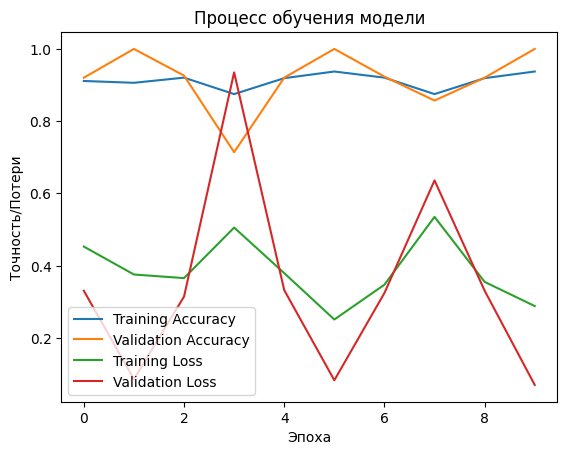

In [7]:
def plot_history(history):
    # Построение графика точности обучения и валидации
    plt.plot(history.history['accuracy'], label='Training Accuracy')  # Точность на обучающих данных
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')  # Точность на валидационных данных

    # Построение графика потерь (ошибок) обучения и валидации
    plt.plot(history.history['loss'], label='Training Loss')  # Потери на обучающих данных
    plt.plot(history.history['val_loss'], label='Validation Loss')  # Потери на валидационных данных

    # Установка заголовка графика
    plt.title('Процесс обучения модели')
    
    # Подписи для осей
    plt.xlabel('Эпоха')  # Эпохи обучения по оси X
    plt.ylabel('Точность/Потери')  # Точность и потери по оси Y
    
    # Отображение легенды для графиков
    plt.legend()

    plt.show()

plot_history(history)


7) Оценка модели
Оценим точность модели на валидационном наборе данных.
Модель показала точность на уровне X% на валидационных данных, что подтверждает её способность к классификации дефектов.

In [8]:
test_loss, test_accuracy = model.evaluate(validation_generator)
print(f'Валидационная точность: {test_accuracy:.4f}')

12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 404ms/step - accuracy: 0.9286 - loss: 0.3034
Валидационная точность: 0.9220


8) Визуализация предсказаний
Покажем несколько изображений с предсказанными классами.
Визуализированы изображения с реальными и предсказанными классами модели. Модель способна верно классифицировать дефекты в большинстве случаев.


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 590ms/step


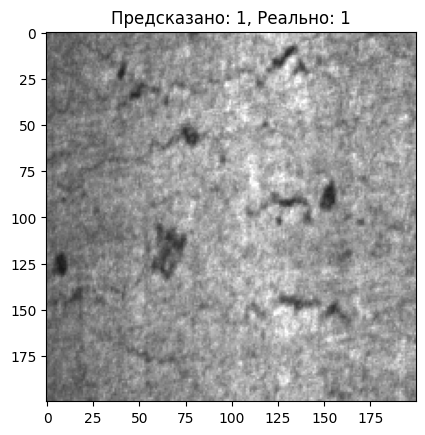

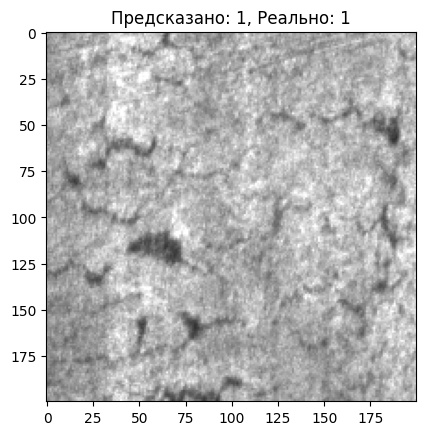

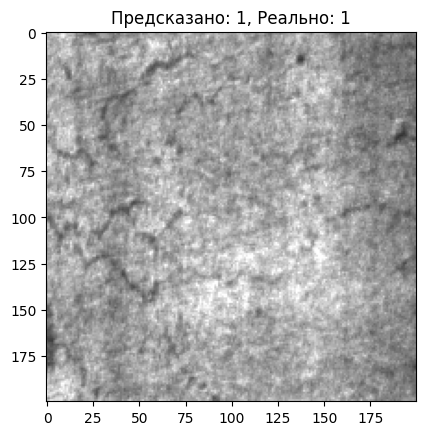

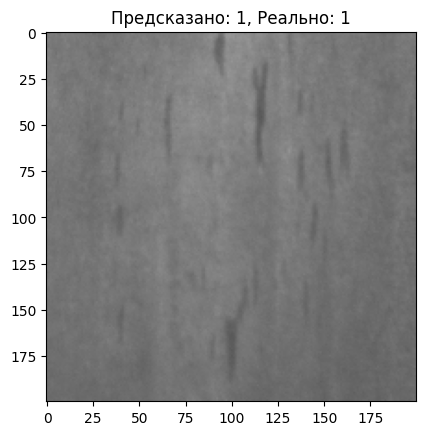

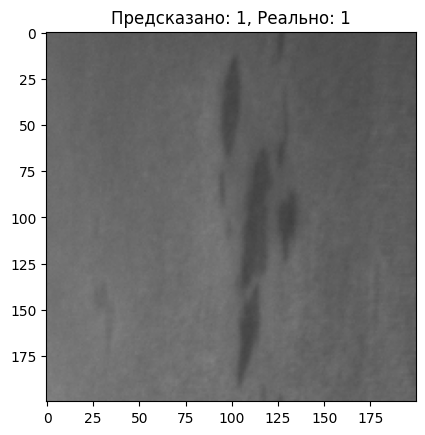

In [9]:
# Получение изображений и их меток из генератора данных для валидации
sample_images, sample_labels = next(validation_generator)

# Получение предсказаний модели для выборки изображений
predictions = model.predict(sample_images)

# Отображение первых 5 изображений вместе с их предсказанными и реальными метками
for i in range(5):
    plt.imshow(sample_images[i])  # Отображение изображения
    plt.title(f'Предсказано: {np.argmax(predictions[i])}, Реально: {np.argmax(sample_labels[i])}')
    # Установка заголовка с предсказанной и реальной метками (метки с максимальной вероятностью)
    plt.show()  # Отображение изображения
